In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

mpl.style.use('seaborn')
plt.rcParams['figure.figsize'] = [20, 7]

In [2]:
import datetime
from dateutil.parser import parse as parse_date

In [3]:
confirmed = pd.read_csv('CSSEGISandData/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths = pd.read_csv('CSSEGISandData/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recovered = pd.read_csv('CSSEGISandData/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [4]:
pop = dict(pd.read_csv('massaged_pop.csv').set_index('country')['2018'])

In [5]:
T=9 # Time to death
CFR=0.01 # Case Fatality Ratio

# Current date

In [6]:
firstday = parse_date(confirmed.columns[4])
today = parse_date(confirmed.columns[-1])
print('Today: ', today)
numdays = (today - firstday).days+1
print('NumDays: ', numdays)

Today:  2020-03-21 00:00:00
NumDays:  60


In [7]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,70,75,82,114,147,177,212,272,322,411
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,701,773,839,825,878,889,924,963,1007
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,200,212,226,243,266,313,345,385,432
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,197,238,428,566,673,790,900,1030,1183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Northwest Territories,Canada,64.8255,-124.8457,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
478,NaN,Cape Verde,15.1111,-23.6167,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
479,NaN,East Timor,-8.5500,125.5600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
480,NaN,Eritrea,15.1794,39.7823,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
def changeColumns(df):
    df.drop(['Lat', 'Long'], axis=1, inplace=True)
    df.rename({'Province/State': 'province', 'Country/Region': 'country'}, axis=1, inplace=True)
changeColumns(confirmed)
changeColumns(deaths)
changeColumns(recovered)

In [9]:
confirmed

,province,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,2,3,5,7,8,8,14,14,...,70,75,82,114,147,177,212,272,322,411
1,NaN,Japan,2,1,2,2,4,4,7,7,...,639,701,773,839,825,878,889,924,963,1007
2,NaN,Singapore,0,1,3,3,4,5,7,7,...,178,200,212,226,243,266,313,345,385,432
3,NaN,Nepal,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,0,0,0,3,4,4,4,7,...,149,197,238,428,566,673,790,900,1030,1183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Northwest Territories,Canada,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
478,NaN,Cape Verde,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
479,NaN,East Timor,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
480,NaN,Eritrea,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
confirmed[~confirmed['province'].isnull()].country.value_counts()

US                247
China              33
Canada             12
France              9
Australia           9
United Kingdom      7
Netherlands         4
Denmark             3
Cruise Ship         1
Name: country, dtype: int64

In [11]:
confirmed[confirmed.country.str.contains('Taiwan')]

,province,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
190,NaN,Taiwan*,1,1,3,3,4,5,8,8,...,49,50,53,59,67,77,100,108,135,153


In [12]:
def sumProvinces(df):
    df = df.copy()
    
    # remove country which has the DiamondPrincess
    df = df[~df.country.str.contains('Others')]
    
    # Sum all provinces for all countries
    # df_no_uc = df[~((df.country == 'China') |  (df.country == 'US'))]
    # df_no_uc = df.copy()
    df_united = df.groupby('country').sum()
    
    idx_list = df_united.index.tolist()
    pos = idx_list.index('China')
    idx_list[pos] = 'China/Total'
    pos = idx_list.index('US')
    idx_list[pos] = 'US/Total'
    df_united.index = idx_list
    
    df_united.index.rename('place', inplace=True)

    df_uc = df[((df.country == 'China') |  (df.country == 'US'))]
    df_uc = df_uc[~df_uc.province.str.contains('Diamond Princess')]
    df_uc['place'] = df_uc['country'] + '/' + df_uc.province.apply(lambda x: x.split(', ')[-1])
    df_uc.drop(['province', 'country'], axis=1, inplace=True)
    # We need to sum because US provinces repeat
    df_uc_sum = df_uc.groupby('place').sum()
    # df_uc.set_index('place', inplace=True)
    
    ret = pd.concat([df_united, df_uc_sum])
    ret.columns = [parse_date(x) for x in ret.columns]
    return ret
con = sumProvinces(confirmed)
rec = sumProvinces(recovered)
dea = sumProvinces(deaths)

In [13]:
con

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21
place,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7,7,11,16,21,22,22,22,24,24
Albania,0,0,0,0,0,0,0,0,0,0,...,23,33,38,42,51,55,59,64,70,76
Algeria,0,0,0,0,0,0,0,0,0,0,...,24,26,37,48,54,60,74,87,90,139
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,2,39,39,53,75,88
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US/WI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
US/Washington,0,0,0,0,0,0,0,0,0,0,...,442,568,572,643,904,1076,1014,1376,1524,1793
US/West Virginia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,2,7,8


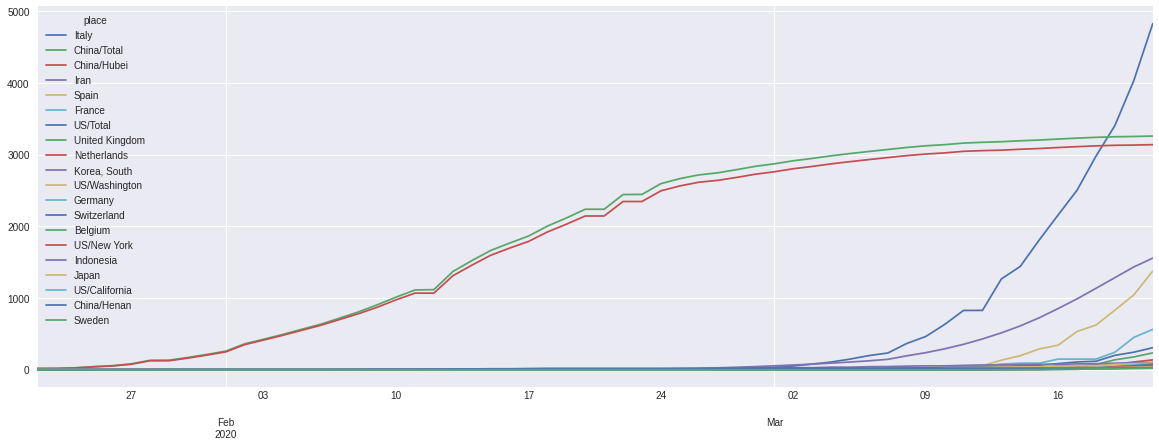

In [14]:
dea.sort_values(today, ascending=False).head(20).T.plot()

In [15]:
def plot3(country, days=numdays, logy=False):
    fig, ax = plt.subplots()
    ax.plot(con[con.index.str.contains(country)][con.columns[-days:]].T, color='blue', label='Confirmed')
    ax.plot((dea[dea.index.str.contains(country)][con.columns[-days:]]).T, color='red', label='Dead')
    ax.plot((rec[rec.index.str.contains(country)][con.columns[-days:]]).T, color='green', label='recovered')
    if logy:
        ax.semilogy()
    ax.legend()

# China cases

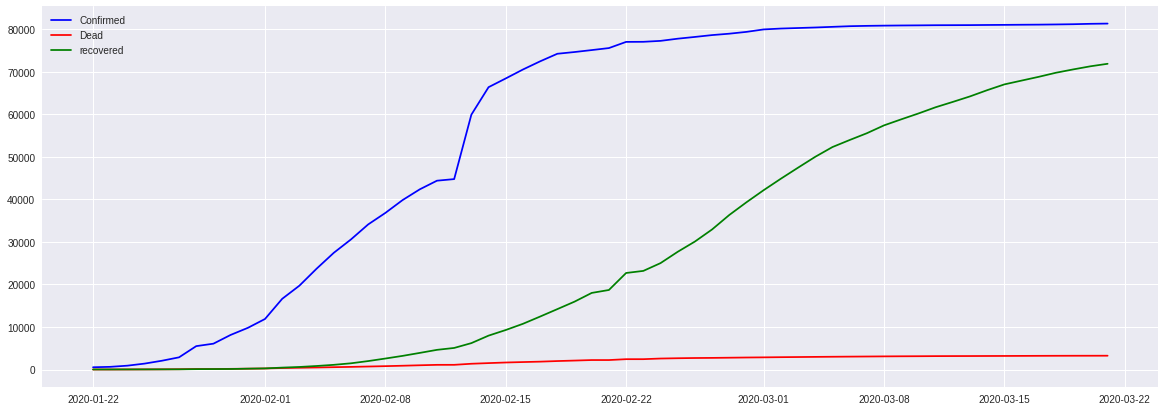

In [16]:
plot3('China/Total')

## Mortality is 4% but 7% still not recovered
* Probably there are a lot of not confirmed cases, I expect actual mortality smaller.
* But a lot of people didn't recover in a month, maybe many will have lasting injuries?

In [17]:
china_dead = dea.loc['China/Total'][today] / con.loc['China/Total'][today]
china_dead

0.04008363569276182

In [18]:
china_recovered = rec.loc['China/Total'][today] / con.loc['China/Total'][today]
china_recovered

0.8837955845273968

In [19]:
1 - (china_dead + china_recovered)

0.07612077977984133

# Number of new cases in China
There are new cases in China again

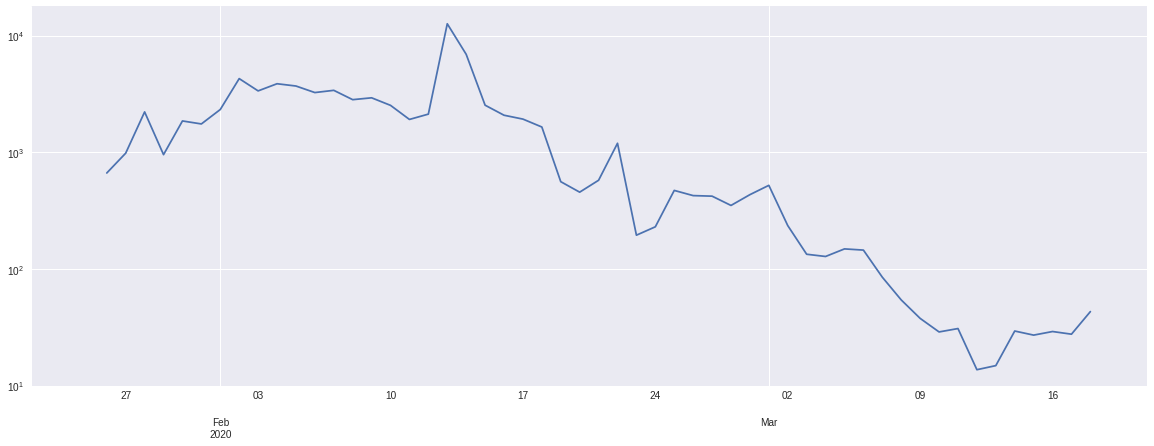

In [20]:
def smoothDaily(series):
    diff = series - series.shift(1)
    return diff.rolling(window=7, win_type='gaussian', center=True).mean(std=0.5)
smoothDaily(con.loc['China/Total']).plot(logy=True)

# South Korea
They have still some growth, but it's not increasing.

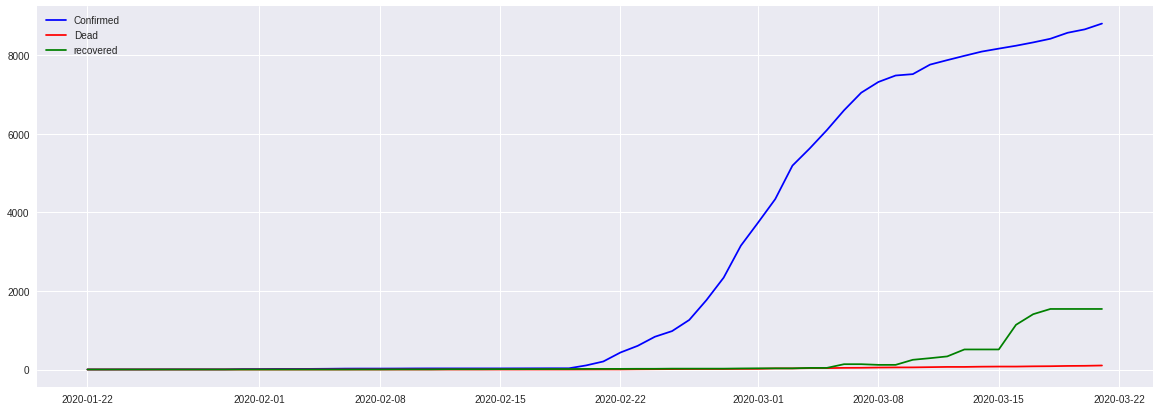

In [21]:
plot3('Korea, South')

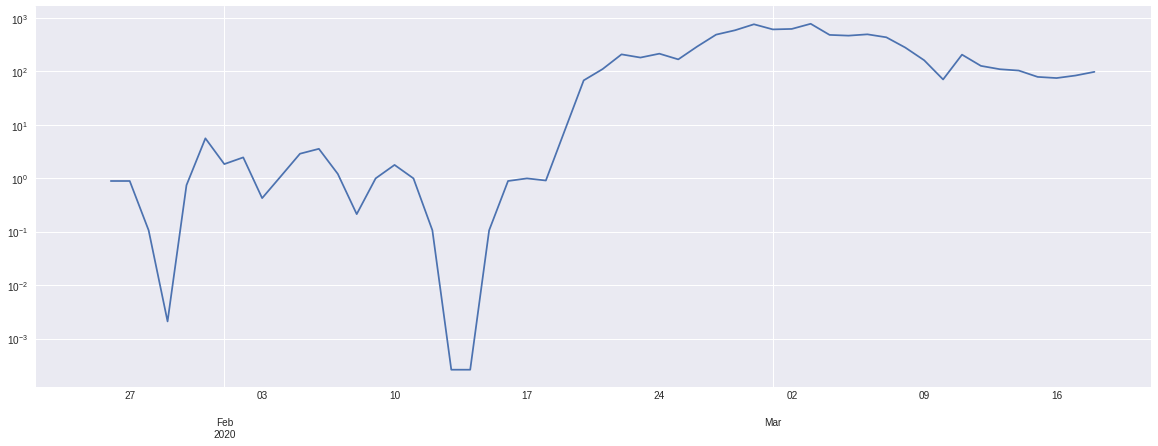

In [22]:
smoothDaily(con.loc['Korea, South']).plot(logy=True)

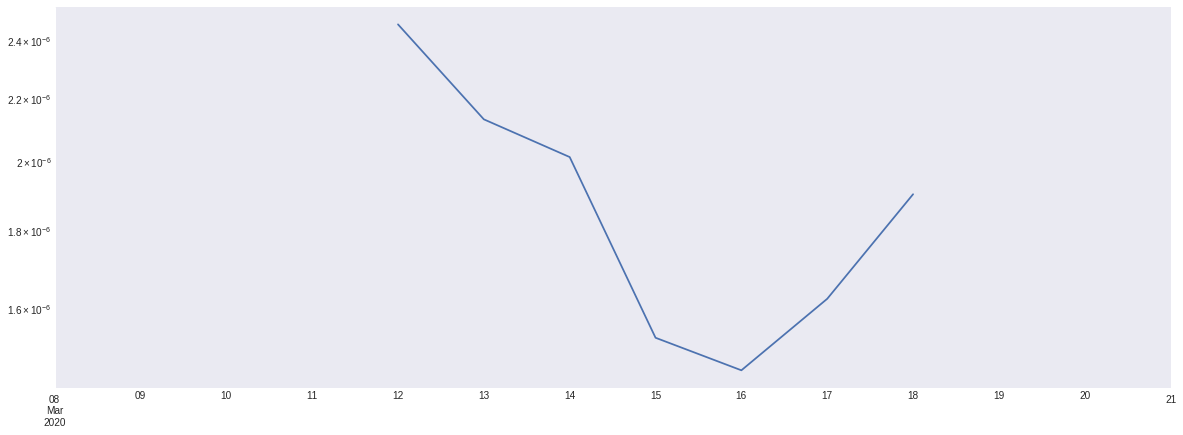

In [23]:
(smoothDaily(con.loc['Korea, South'][-14:]) / pop['Korea, South']).plot(logy=True) 

In [24]:
def last7Growth(s):
    week_growth = (s / s.shift(7))[-7:].mean()
    day_growth = week_growth ** (1/7.)
    print("Weekly growth:", week_growth)
    print("Daily growth:", day_growth)
    return day_growth

def backGuess(country, t=T, cfr=CFR, growth = None):
    df = pd.DataFrame({'confirmed': con.loc[country], 'backguess': (1/cfr)*dea.loc[country].shift(-t)})
    tdaysago = df[:-T]
    lastRatio = df.backguess[-T-1] / df.confirmed[-T-1]
    print("T days ago confirmed_cases=", df.confirmed[-T-1], "backguess=", df.backguess[-T-1], "ratio=", df.backguess[-T-1] / df.confirmed[-T-1])
    lastGuess = df.backguess[-T-1]
    print("Last guess T days ago:", lastGuess)
    if growth == None:
        growth = last7Growth(con.loc[country])
    print("Extrapolating with growht factor:", growth)
    for i in range(T):
        lastGuess *= growth
        df.loc[df.index[-T+i], 'backguess'] = lastGuess

    print("Extrapolating to today from with growth factor:", df.backguess[-1])

    print("Reported confirmed today: ", df.confirmed[-1])
    print("Extrapolating from today confirmed by last ratio seen: ", df.confirmed[-1] * lastRatio)

    return df


T days ago confirmed_cases= 7869 backguess= 10200.0 ratio= 1.2962256957682043
Last guess T days ago: 10200.0
Weekly growth: 1.095791454012818
Daily growth: 1.0131538884671245
Extrapolating with growht factor: 1.0131538884671245
Extrapolating to today from with growth factor: 11473.050680332524
Reported confirmed today:  8799
Extrapolating from today confirmed by last ratio seen:  11405.48989706443


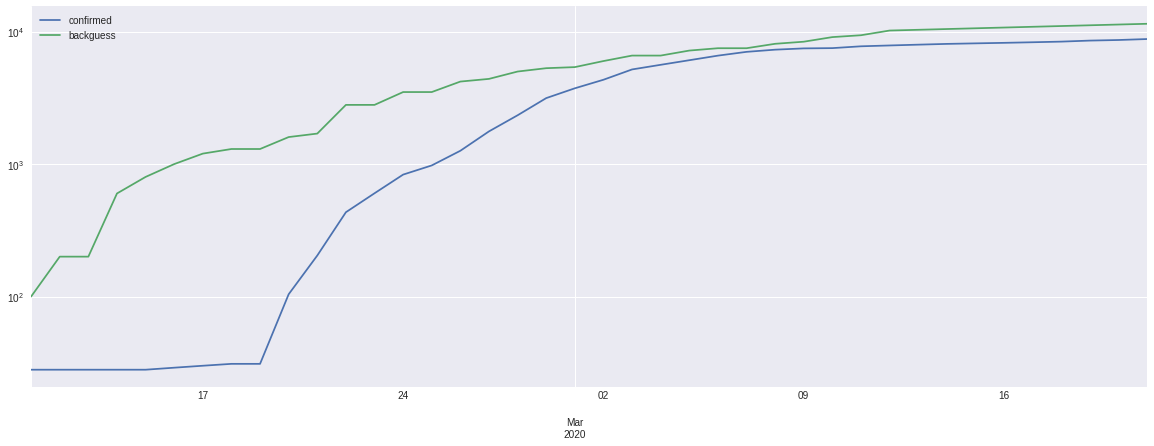

In [25]:
backGuess('Korea, South')[-40:].plot(logy=True)

# Italy

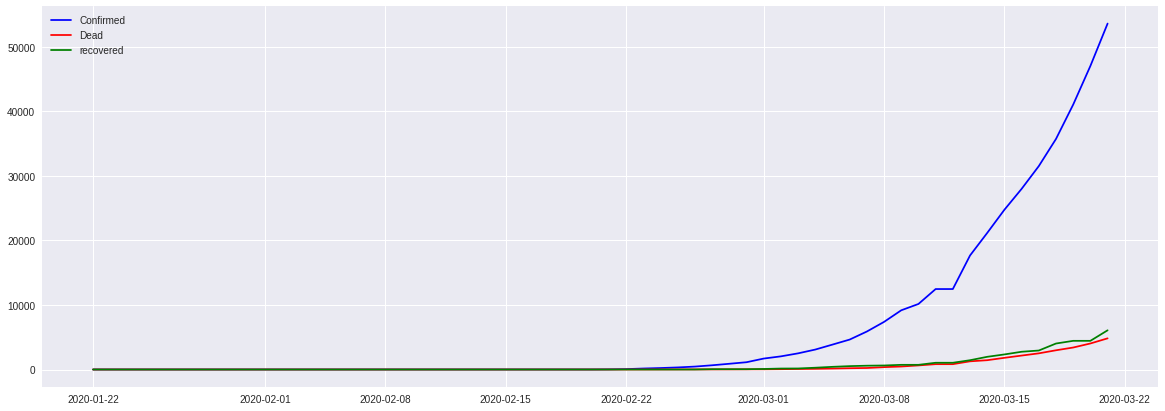

In [26]:
plot3('Italy')

## Officially confirmed cases per capita is 1 in 1000.

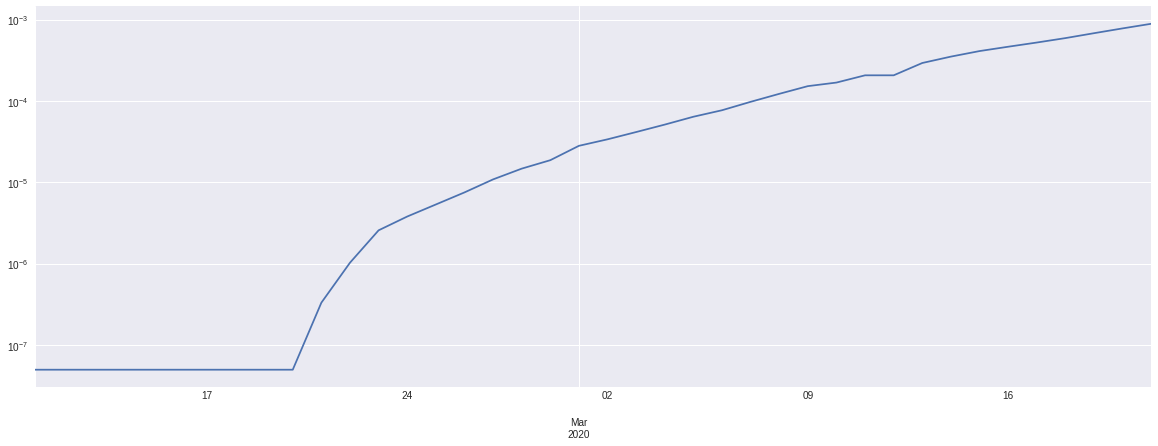

In [27]:
((con.loc['Italy'][-40:])/pop['Italy']).plot(logy=True)

## Number of daily cases

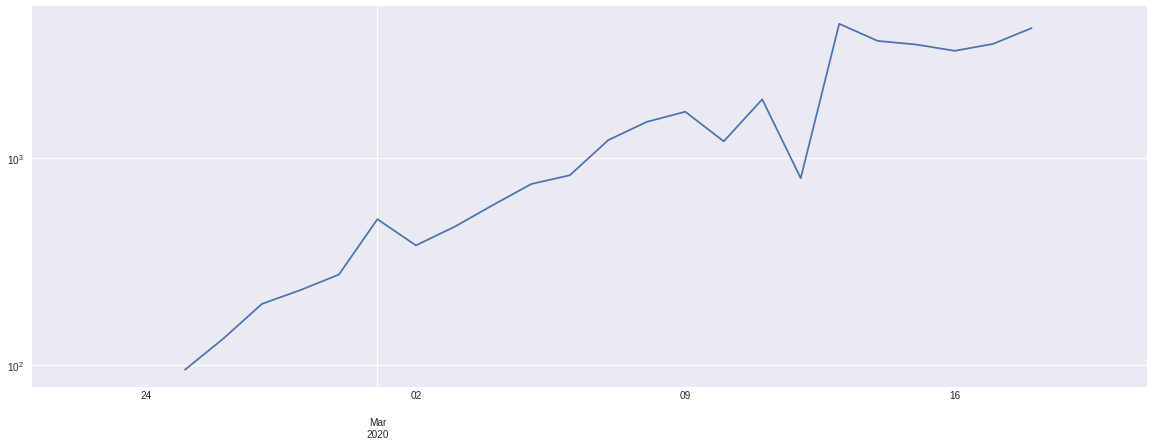

In [28]:
smoothDaily(con.loc['Italy'][-30:]).plot(logy=True)

## Number of confirmed cases still multiply by 2.5 weekly

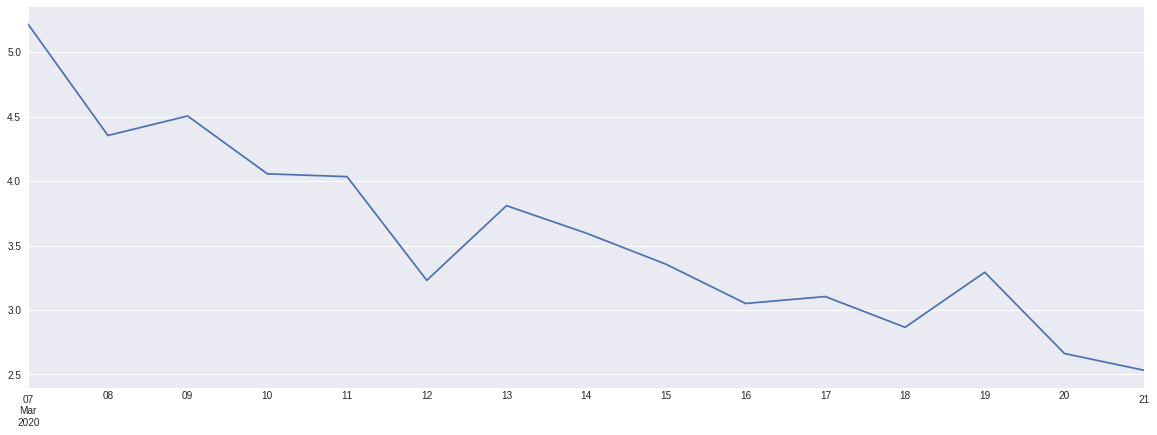

In [29]:
con_weekly = con.loc['Italy']
(con_weekly / con_weekly.shift(7))[-15:].plot()

## Number of deaths multiply by ~3 weekly

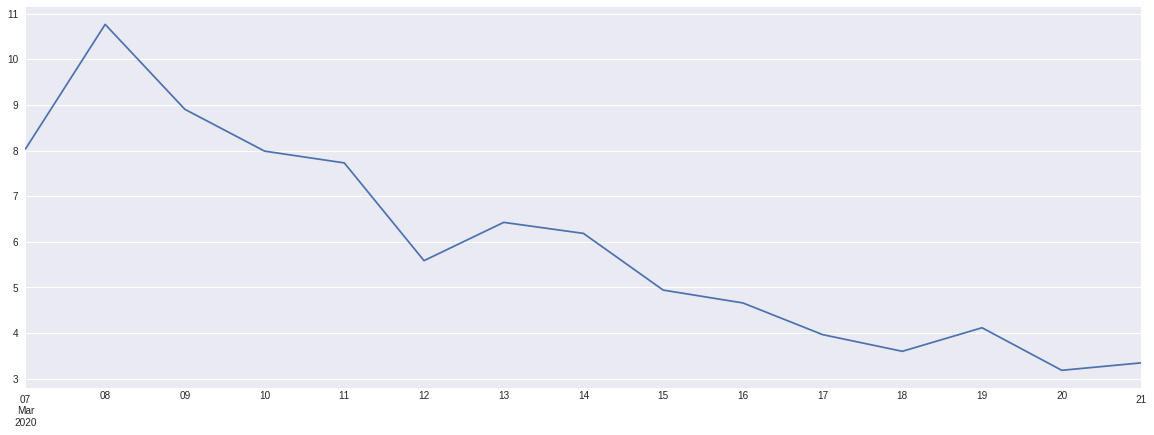

In [30]:
s = dea.loc['Italy']
(s / s.shift(7))[-15:].plot()

## Daily growth factor of new cases 1.16

In [31]:

it_growth = last7Growth(con.loc['Italy'])


Weekly growth: 2.9805704088120564
Daily growth: 1.1688453543895223


## This method estimates 2 milion currently infected in Italy

T days ago confirmed_cases= 12462 backguess= 482500.0 ratio= 38.71770181351308
Last guess T days ago: 482500.0
Weekly growth: 2.9805704088120564
Daily growth: 1.1688453543895223
Extrapolating with growht factor: 1.1688453543895223
Extrapolating to today from with growth factor: 1964765.9056164396
Reported confirmed today:  53578
Extrapolating from today confirmed by last ratio seen:  2074417.027764404


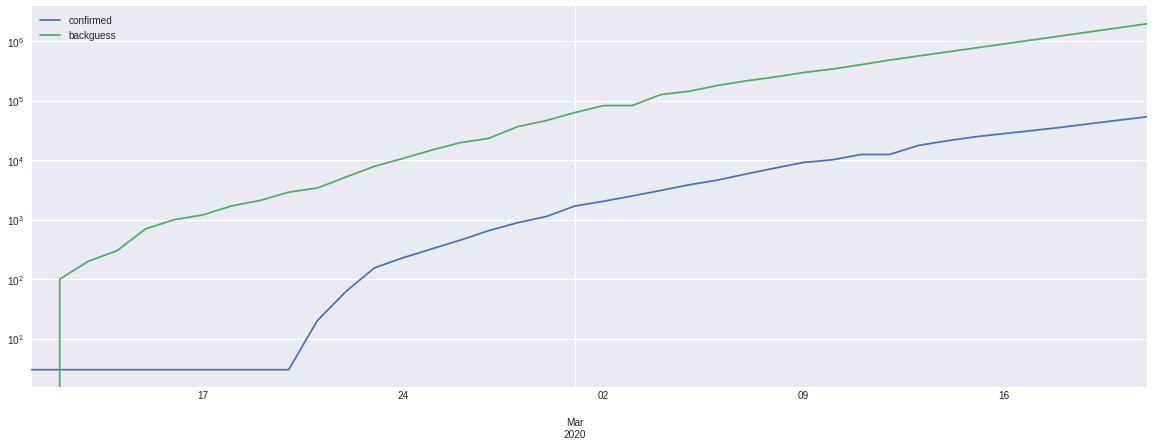

In [32]:

it_backguess = backGuess('Italy')
it_backguess[-40:].plot(logy=True)

## The guess is that 3% of Italy is infected

In [33]:
(it_backguess/pop['Italy']).iloc[-1]

confirmed    0.000887
backguess    0.032512
Name: 2020-03-21 00:00:00, dtype: float64

# Assuming exponential growth 
* we have 5.8M infected by next week
* in 17 days 50% is infected.

In [34]:
it_backguess.backguess[-1] * it_growth**7

5856123.118523179

In [35]:
math.log((pop['Italy']/2)/it_backguess.backguess[-1], it_growth)

17.517305093691423

## Assuming the constant number of new cases from here on it would take 151 days

In [36]:
last_week_cases = (it_backguess.backguess[-1] - it_backguess.backguess[-8])
last_week_cases

1305574.66497082

In [37]:
(((pop['Italy']/2) - it_backguess.backguess[-1]) / last_week_cases)*7

151.4705627081886